##### Mediapipe 手勢辨識
這篇教學會延伸「Mediapipe 手掌偵測 ( hands )」文章的範例，當偵測到手指的節點後，運用公式計算出「手指角度」，\
再透過手指的角度進行手勢辨識 ( 辨識手勢 0～9、比 rock、比讚...等 )。

因為程式中的 OpenCV 會需要使用鏡頭或 GPU，所以請使用本機環境或使用 Anaconda Jupyter 進行實作，\
並安裝 OpenCV 函式庫 ( 參考：[OpenCV 函式庫](https://steam.oxxostudio.tw/category/python/ai/opencv.html) )。

##### 計算手指角度，進行手勢辨識 
因為整體程式碼較多，因此將詳細說明寫在程式碼的註解內，程式碼的重點如下：
* import math 函式庫，參考「[靜態手勢 - 圖像二維方式約束參考代碼](https://gitcode.net/EricLee/handpose_x/-/issues/3?from_codechina=yes)」文章，\
定義透過節點座標計算五隻手指角度的函式 ( vector_2d_angle 和 hand_angle )。
* 取得手指角度後 ( 串列格式 )，再定義另外一個函式 ( hand_pos )，由這個函式判斷角度範圍，\
回傳該角度所代表的文字。
* 參考「[Mediapipe 手掌偵測 ( hands )](https://steam.oxxostudio.tw/category/python/ai/ai-mediapipe-hand.html))」文章，啟用手掌偵測並將偵測到的節點座標，\
帶入 hand_angle 函式，將計算出的角度串列帶入 hand_pos 求出目前的手勢。
* 如果偵測到手指的角度如果小於 50 度，表示手指伸直，大於等於 50 度表示手指捲縮，\
可使用 print 先印出結果，再根據結果調整角度範圍。

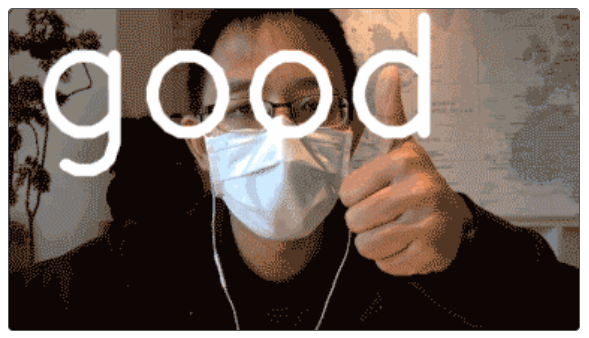

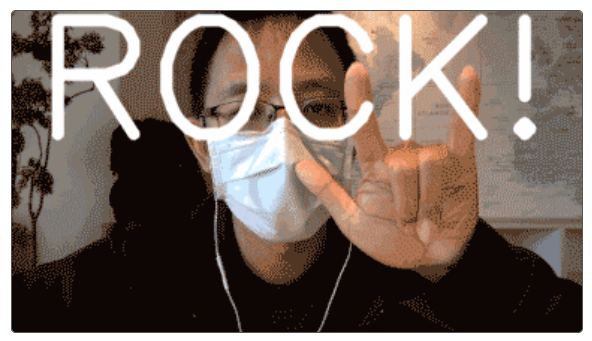

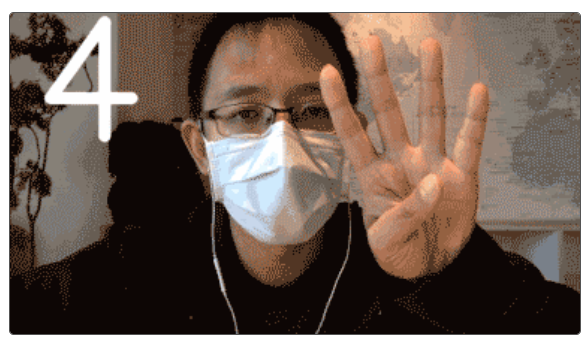

In [ ]:
import cv2
import mediapipe as mp
import math

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# 根據兩點的座標，計算角度
def vector_2d_angle(v1, v2):
    """
    計算兩個 2D 向量之間的夾角。

    參數:
    v1 (tuple): 第一個向量的座標 (x, y)。
    v2 (tuple): 第二個向量的座標 (x, y)。

    回傳:
    float: 兩個向量之間的夾角，單位為度數。如果計算過程中發生錯誤，回傳 180 度。
    """
    v1_x = v1[0]  # 第一個向量的 x 座標
    v1_y = v1[1]  # 第一個向量的 y 座標
    v2_x = v2[0]  # 第二個向量的 x 座標
    v2_y = v2[1]  # 第二個向量的 y 座標

    try:
        # 計算兩個向量之間的夾角，使用餘弦定理
        angle_ = math.degrees(math.acos(
            (v1_x * v2_x + v1_y * v2_y) / 
            (((v1_x ** 2 + v1_y ** 2) ** 0.5) * ((v2_x ** 2 + v2_y ** 2) ** 0.5))
        ))
    except:
        # 如果計算過程中發生錯誤，回傳 180 度
        angle_ = 180

    return angle_

# 根據傳入的 21 個節點座標，得到該手指的角度
def hand_angle(hand_):
    angle_list = []
    # thumb 大拇指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0])- int(hand_[2][0])),(int(hand_[0][1])-int(hand_[2][1]))),
        ((int(hand_[3][0])- int(hand_[4][0])),(int(hand_[3][1])- int(hand_[4][1])))
        )
    angle_list.append(angle_)
    # index 食指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0])-int(hand_[6][0])),(int(hand_[0][1])- int(hand_[6][1]))),
        ((int(hand_[7][0])- int(hand_[8][0])),(int(hand_[7][1])- int(hand_[8][1])))
        )
    angle_list.append(angle_)
    # middle 中指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0])- int(hand_[10][0])),(int(hand_[0][1])- int(hand_[10][1]))),
        ((int(hand_[11][0])- int(hand_[12][0])),(int(hand_[11][1])- int(hand_[12][1])))
        )
    angle_list.append(angle_)
    # ring 無名指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0])- int(hand_[14][0])),(int(hand_[0][1])- int(hand_[14][1]))),
        ((int(hand_[15][0])- int(hand_[16][0])),(int(hand_[15][1])- int(hand_[16][1])))
        )
    angle_list.append(angle_)
    # pink 小拇指角度
    angle_ = vector_2d_angle(
        ((int(hand_[0][0])- int(hand_[18][0])),(int(hand_[0][1])- int(hand_[18][1]))),
        ((int(hand_[19][0])- int(hand_[20][0])),(int(hand_[19][1])- int(hand_[20][1])))
        )
    angle_list.append(angle_)
    return angle_list

# 根據手指角度的串列內容，返回對應的手勢名稱
def hand_pos(finger_angle):
    f1 = finger_angle[0]   # 大拇指角度
    f2 = finger_angle[1]   # 食指角度
    f3 = finger_angle[2]   # 中指角度
    f4 = finger_angle[3]   # 無名指角度
    f5 = finger_angle[4]   # 小拇指角度

    # 小於 50 表示手指伸直，大於等於 50 表示手指捲縮
    if f1<50 and f2>=50 and f3>=50 and f4>=50 and f5>=50:
        return 'good'
    elif f1>=50 and f2>=50 and f3<50 and f4>=50 and f5>=50:
        return 'no!!!'
    elif f1<50 and f2<50 and f3>=50 and f4>=50 and f5<50:
        return 'ROCK!'
    elif f1>=50 and f2>=50 and f3>=50 and f4>=50 and f5>=50:
        return '0'
    elif f1>=50 and f2>=50 and f3>=50 and f4>=50 and f5<50:
        return 'pink'
    elif f1>=50 and f2<50 and f3>=50 and f4>=50 and f5>=50:
        return '1'
    elif f1>=50 and f2<50 and f3<50 and f4>=50 and f5>=50:
        return '2'
    elif f1>=50 and f2>=50 and f3<50 and f4<50 and f5<50:
        return 'ok'
    elif f1<50 and f2>=50 and f3<50 and f4<50 and f5<50:
        return 'ok'
    elif f1>=50 and f2<50 and f3<50 and f4<50 and f5>50:
        return '3'
    elif f1>=50 and f2<50 and f3<50 and f4<50 and f5<50:
        return '4'
    elif f1<50 and f2<50 and f3<50 and f4<50 and f5<50:
        return '5'
    elif f1<50 and f2>=50 and f3>=50 and f4>=50 and f5<50:
        return '6'
    elif f1<50 and f2<50 and f3>=50 and f4>=50 and f5>=50:
        return '7'
    elif f1<50 and f2<50 and f3<50 and f4>=50 and f5>=50:
        return '8'
    elif f1<50 and f2<50 and f3<50 and f4<50 and f5>=50:
        return '9'
    else:
        # 當所有條件都不符合時，回傳一個空字串，表示沒有匹配到任何手勢。
        return ''

cap = cv2.VideoCapture(0)            # 讀取攝影機
fontFace = cv2.FONT_HERSHEY_SIMPLEX  # 印出文字的字型
lineType = cv2.LINE_AA               # 印出文字的邊框

# mediapipe 啟用偵測手掌
with mp_hands.Hands(
    model_complexity=0,  # 模型複雜度，0 為最簡單的模型，適合效能較低的設備
    min_detection_confidence=0.5,  # 最小偵測信心值，範圍為 [0.0, 1.0]
    min_tracking_confidence=0.5  # 最小追蹤信心值，範圍為 [0.0, 1.0]
) as hands:

    if not cap.isOpened():
        print("Cannot open camera")  # 無法開啟攝影機時，印出錯誤訊息並退出
        exit()
    
    w, h = 1080, 720  # 影像尺寸，設定寬度為 540 像素，高度為 310 像素
    
    while True:
        ret, img = cap.read()  # 讀取攝影機影像
        img = cv2.resize(img, (w, h))  # 縮小尺寸，加快處理效率
        
        if not ret:
            print("Cannot receive frame")  # 無法接收影像時，印出錯誤訊息並跳出迴圈
            break
        
        img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 轉換成 RGB 色彩
        results = hands.process(img2)  # 偵測手勢
        
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                finger_points = []  # 記錄手指節點座標的串列
                
                for i in hand_landmarks.landmark:
                    # 將 21 個節點換算成座標，記錄到 finger_points
                    x = i.x * w
                    y = i.y * h
                    finger_points.append((x, y))
                
                if finger_points:
                    finger_angle = hand_angle(finger_points)  # 計算手指角度，回傳長度為 5 的串列
                    #print(finger_angle)  # 印出角度 ( 有需要就開啟註解 )
                    text = hand_pos(finger_angle)  # 取得手勢所回傳的內容
                    cv2.putText(img, text, (30, 120), fontFace, 5, (255, 255, 255), 10, lineType)  # 印出文字

        cv2.imshow('oxxostudio', img)  # 顯示影像
        
        if cv2.waitKey(5) == ord('q'):  # 每 5 毫秒檢查一次是否按下 'q' 鍵，若按下則跳出迴圈
            break
    
cap.release()  # 釋放攝影機資源
cv2.destroyAllWindows()  # 關閉所有 OpenCV 視窗